In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sklearn
from sklearn.cluster import
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [15]:
collar=pd.read_csv("C:/Users/TIYANI/Videos/Final/Data generation/Geomet.csv", index_col='Hole_Id')
collar

,Depth_From,Depth_To,Bond_Work,Abression,Rodmill_In,Drop_Weigh,RQD,AxB,X,Y,Z,Depth_max
Hole_Id,,,,,,,,,,,,
KRED207,0.0,10.0,0.0,0.00,0.0,0.0,0.00,0.00,530167.06,8714340.88,1330.60,104.5
KRED207,10.0,14.0,10.3,0.32,13.7,21.0,45.00,0.67,530167.06,8714340.88,1330.60,104.5
KRED207,14.0,17.2,12.0,0.02,13.8,16.0,54.74,0.32,530167.06,8714340.88,1330.60,104.5
KRED207,17.2,27.0,12.0,0.02,13.8,16.0,54.74,0.32,530167.06,8714340.88,1330.60,104.5
KRED207,27.0,31.2,12.0,0.02,13.8,16.0,54.74,0.32,530167.06,8714340.88,1330.60,104.5
...,...,...,...,...,...,...,...,...,...,...,...,...
KRED336,42.5,44.1,12.0,0.02,13.8,16.0,54.74,0.32,530250.77,8714398.72,1330.35,92.0
KRED336,44.1,49.8,19.6,0.02,4.0,6.1,16.00,0.24,530250.77,8714398.72,1330.35,92.0
KRED336,49.8,78.5,14.3,0.78,18.9,11.3,70.00,41.10,530250.77,8714398.72,1330.35,92.0


In [16]:
X = StandardScaler().fit_transform(t)

In [18]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 0
Estimated number of noise points: 1122


NameError: name 'labels_true' is not defined

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 65.9/65.9 MB 534.0 kB/s eta 0:00:00


ModuleNotFoundError: No module named 'kaleido'

In [20]:
from sklearn.neighbors import NearestNeighbors

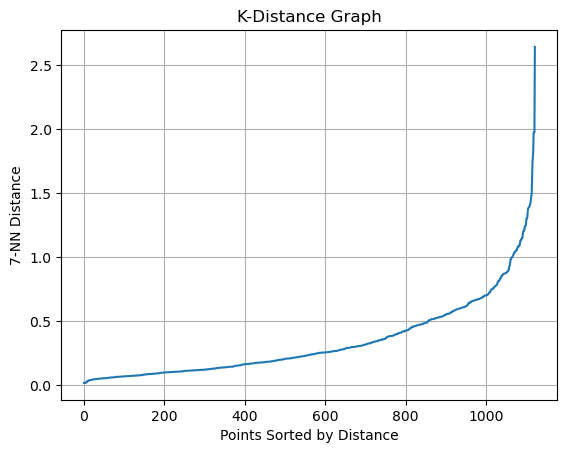

In [22]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(X)
distances, indices = knn.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');


In [25]:
db = DBSCAN(eps = 0.080, min_samples = 8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)



Number of Clusters :  0
Number of Outliers :  1122


In [27]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours

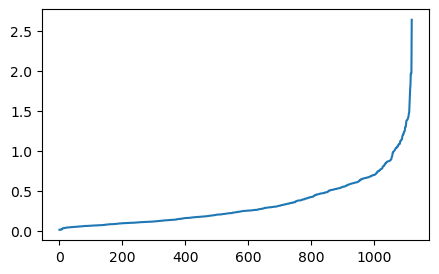

In [28]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [40]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.1, min_samples = 0.5).fit(X) # fitting the model
labels = dbscan.labels_ # getting the labels

In [43]:
# Plot the clusters
plt.scatter(collar[:, 0], collar[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [1]:
pip install itertools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
